# Modelo de Regressão Linear Logística

## Análise dos dados

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
titanic = pd.read_csv("..\\dados\\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
ports = pd.get_dummies(titanic.Embarked, prefix="Embarked")
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [5]:
titanic = titanic.join(ports)
titanic.drop(["Embarked"], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


In [6]:
titanic.Sex = titanic.Sex.map({"male": 0, "female": 1})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [7]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,0,NaN,0,0,8.4583,0,1,0
17,1,2,0,NaN,0,0,13.0000,0,0,1
19,1,3,1,NaN,0,0,7.2250,1,0,0
26,0,3,0,NaN,0,0,7.2250,1,0,0
28,1,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,1,0,0
863,0,3,1,NaN,8,2,69.5500,0,0,1
868,0,3,0,NaN,0,0,9.5000,0,0,1
878,0,3,0,NaN,0,0,7.8958,0,0,1


In [8]:
titanic.shape

(891, 10)

In [9]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


## Desenvolver o modelo

In [12]:
surv = titanic.Survived.copy()

data = titanic.drop(["Survived"], axis=1)

data_train, data_test, surv_train, surv_test = train_test_split(data, surv, test_size=0.2, random_state=0)

In [13]:
scaler = preprocessing.StandardScaler().fit(data_train)
data_scaled = scaler.transform(data_train)

In [14]:
model = LogisticRegression()
model.fit(data_scaled, surv_train)

LogisticRegression()

## Testar o modelo

In [16]:
surv_pred = pd.Series(model.predict(scaler.transform(data_test)))

surv_test = surv_test.reset_index(drop=True)
surv_comparison = pd.concat([surv_test, surv_pred], axis=1)
surv_comparison.columns = ["Real", "Prediction"]
surv_comparison.head()

,Real,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1


In [17]:
print("Accuracy:", metrics.accuracy_score(surv_test, surv_pred))
print("Precision:", metrics.precision_score(surv_test, surv_pred))
print("Recall:", metrics.recall_score(surv_test, surv_pred))

Accuracy: 0.7988826815642458
Precision: 0.7391304347826086
Recall: 0.7391304347826086


## Análise dos resultados

In [18]:
cnf_matrix = metrics.confusion_matrix(surv_test, surv_pred)

print(cnf_matrix)

[[92 18]
 [18 51]]


Text(0.5, 15.0, 'Predicted')

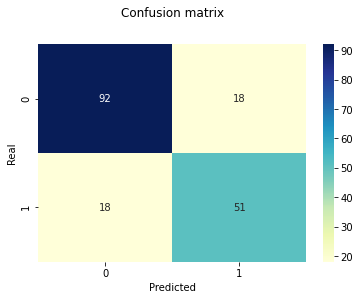

In [20]:
labels = [0, 1]

plt.subplots()
tick_marks = np.arange(len(labels))

plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")

plt.title("Confusion matrix", y=1.1)
plt.ylabel("Real")
plt.xlabel("Predicted")